In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [ ]:
!wget $data

--2023-10-01 20:09:45--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.05s   

2023-10-01 20:09:45 (26.7 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [ ]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [ ]:
for col in strings:
  df[col] = df[col].str.lower().str.replace(' ','_')

In [ ]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [ ]:
for col in df.columns:
  print(col)
  print(df[col].unique()[:5])
  print(df[col].nunique())

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48
model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914
year
[2011 2012 2013 1992 1993]
28
engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10
engine_hp
[335. 300. 230. 320. 172.]
356
engine_cylinders
[ 6.  4.  5.  8. 12.]
9
transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5
driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4
number_of_doors
[ 2.  4.  3. nan]
3
market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71
vehicle_size
['compact' 'midsize' 'large']
3
vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16
highway_mpg
[26 28 27 25 24]
59
city_mpg
[19 20 18 17 16]
69
popularity
[3916 3105  819  617 1013]
48
msrp
[46135 40650 36350 29450 34500]
6049


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

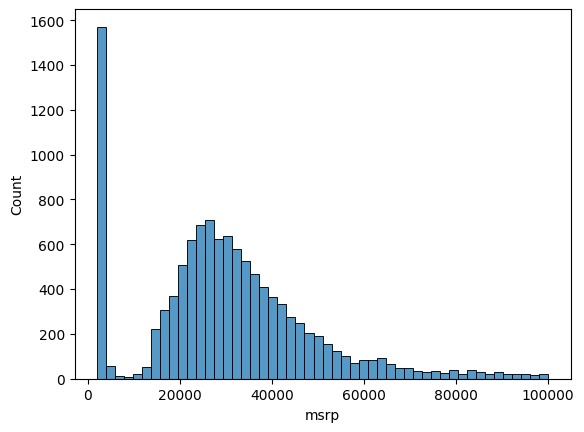

In [ ]:
sns.histplot(df.msrp[df.msrp < 100000],bins = 50)

In [ ]:
price_logs = np.log1p(df.msrp)
price_logs
#to gain normal distribution
#with normal distribution, modeling is a lot more easier
#log1p = np.log([0+1,10+1,100+1]) like this

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

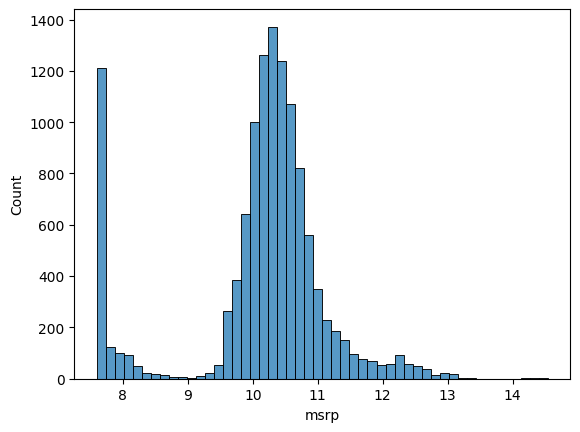

In [ ]:
sns.histplot(price_logs, bins = 50)

In [ ]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [ ]:
n = len(df)
n_test = int(n*0.2)
n_val = int(n*0.2)
n_train = n - n_test - n_val

In [ ]:
idx = np.arange(n)

In [ ]:
np.random.seed(3)
np.random.shuffle(idx)

In [ ]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [ ]:
len(df_train),len(df_val),len(df_test)

(7150, 2382, 2382)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [ ]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [ ]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [ ]:
df_train.iloc[10]

make                            toyota
model                           sienna
year                              2016
engine_fuel_type      regular_unleaded
engine_hp                        266.0
engine_cylinders                   6.0
transmission_type            automatic
driven_wheels          all_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                     large
vehicle_style        passenger_minivan
highway_mpg                         23
city_mpg                            16
popularity                        2031
Name: 10, dtype: object

In [ ]:
xi = [208.4, 23, 16]
w0 = 7.17
wi = [0.01,0.2,0.03]

In [ ]:
def linear_regression(xi):
  pred = w0;
  n = len(xi)
  for i in range(n):
    pred = pred + (wi[i]*xi[i])
  return pred

In [ ]:
linear_regression(xi)

14.334

In [ ]:
def train_linear_regression(X,y):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones,X])
  XTX = np.dot(X.T,X)
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0],w_full[1:]

In [ ]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [ ]:
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

In [ ]:
def prepare_X(df):
  df = df.copy()
  df['age'] = 2017-df['year']
  features = base+['age']

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

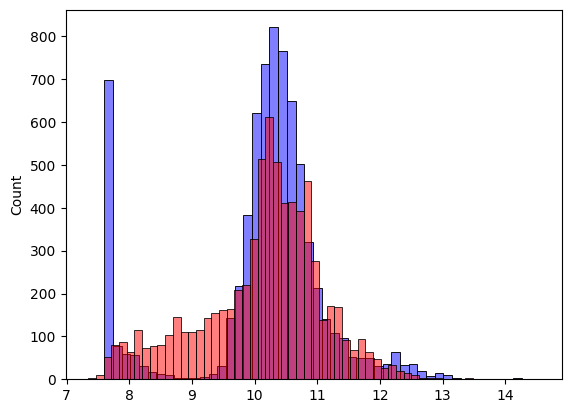

In [ ]:
sns.histplot(y_train, color = 'blue',alpha = 0.5, bins = 50)
sns.histplot(y_pred, color = 'red', alpha =0.5, bins = 50)

In [ ]:
def rmse(y,y_pred):
  se = (y-y_pred)**2
  mse = np.mean(se)
  rmse = np.sqrt(mse)
  return rmse

In [ ]:
rmse(y_train,y_pred)

0.5190023824313631

In [ ]:
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)
rmse(y_val,y_pred)

0.512385164444267

<Axes: ylabel='Count'>

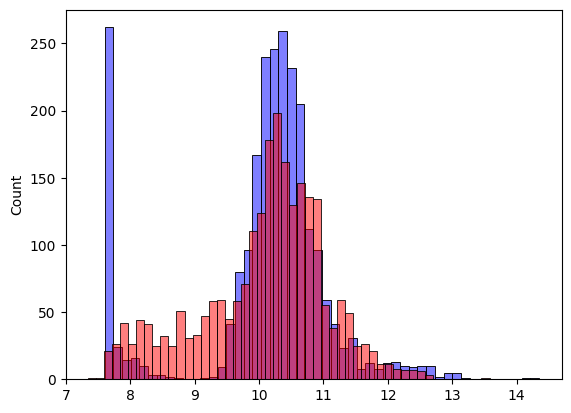

In [ ]:
sns.histplot(y_val, color = 'blue',alpha = 0.5, bins = 50)
sns.histplot(y_pred, color = 'red', alpha =0.5, bins = 50)

In [ ]:
def prepare_X(df):
  df = df.copy()
  features = base.copy()
  df['age'] = 2017-df.year
  features.append('age')

  for v in [2,3,4]:
    df['num_of_doors_%s'%v] = (df.number_of_doors == v).astype('int')
    features.append('num_of_doors_%s'%v)

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)
rmse(y_val,y_pred)

0.512783309191137

In [ ]:
w0

10.761009025876525

In [ ]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [ ]:
categorical_variable = ['make','engine_fuel_type','transmission_type','driven_wheels','market_category','vehicle_size','vehicle_style']

In [ ]:
categories = {}

for c in categorical_variable:
  categories[c] = list(df[c].value_counts().head().index)

In [ ]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [ ]:
def prepare_X(df):
  df = df.copy()
  features = base.copy()
  df['age'] = 2017-df.year
  features.append('age')

  for v in [2,3,4]:
    df['num_of_doors_%s' % v] = (df.number_of_doors == v).astype('int')
    features.append('num_of_doors_%s' % v)

  for c, values in categories.items():
    for value in values:
      df['%s_%s'% (c,value)] = (df[c] == value).astype('int')
      features.append('%s_%s' % (c,value))

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0+np.dot(X_val,w)
rmse(y_val,y_pred)

139.72422425393964

In [ ]:
def train_linear_regression_reg(X,y,r=0.001):
  ones = np.ones(X.shape[0])
  X = np.column_stack([ones,X])
  XTX = np.dot(X.T,X)
  XTX = XTX+r*np.eye(XTX.shape[0])
  XTX_inv = np.linalg.inv(XTX)
  w_full = XTX_inv.dot(X.T).dot(y)

  return w_full[0],w_full[1:]

In [ ]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression_reg(X_train,y_train,r=0.01)

X_val = prepare_X(df_val)
y_pred = w0+np.dot(X_val,w)
rmse(y_val,y_pred)

0.45623618289499596

In [ ]:
#model tuning
for r in [0.0,0.0001,0.001,0.01,1,10]:
  X_train = prepare_X(df_train)
  w0,w = train_linear_regression_reg(X_train,y_train,r=r)

  X_val = prepare_X(df_val)
  y_pred = w0+np.dot(X_val,w)
  score = rmse(y_val,y_pred)
  print(w0,score,r)

1.3870810108424276e+16 139.72422425393964 0.0
6.476070102397247 0.4562404824628485 0.0001
6.345568671519494 0.45624008507384517 0.001
6.330436446781679 0.45623618289499596 0.01
5.554566566207475 0.45621182145757 1
4.251198788577748 0.4668718633831125 10


In [ ]:
r=0.01
X_train = prepare_X(df_train)
w0,w = train_linear_regression_reg(X_train,y_train,r=r)

X_val = prepare_X(df_val)
y_pred = w0+np.dot(X_val,w)
rmse(y_val,y_pred)

0.45623618289499596

In [ ]:
df_full_train = pd.concat([df_train,df_val])

In [ ]:
df_full_train = df_full_train.reset_index(drop=True)

In [ ]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,volvo,s70,2000,regular_unleaded,190.0,5.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,870
1,gmc,s-15,1990,regular_unleaded,105.0,4.0,manual,rear_wheel_drive,2.0,NaN,compact,extended_cab_pickup,25,21,549
2,oldsmobile,ninety-eight,1995,regular_unleaded,225.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,sedan,26,17,26
3,aston_martin,dbs,2010,premium_unleaded_(required),510.0,12.0,automatic,rear_wheel_drive,2.0,"exotic,high-performance",midsize,convertible,18,12,259
4,chevrolet,s-10,2002,regular_unleaded,190.0,6.0,automatic,rear_wheel_drive,2.0,performance,compact,regular_cab_pickup,20,15,1385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,bmw,activehybrid_7,2014,premium_unleaded_(required),350.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance,hybrid",large,sedan,30,22,3916
9528,volkswagen,phaeton,2004,premium_unleaded_(recommended),420.0,12.0,automatic,all_wheel_drive,4.0,"luxury,performance",large,sedan,17,11,873
9529,infiniti,q70,2015,premium_unleaded_(required),330.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,performance",large,sedan,26,18,190
9530,nissan,truck,1996,regular_unleaded,134.0,4.0,manual,four_wheel_drive,2.0,NaN,compact,extended_cab_pickup,18,15,2009


In [ ]:
X_full_train = prepare_X(df_full_train)

In [ ]:
y_full_train = np.concatenate([y_train,y_val])

In [ ]:
w0,w = train_linear_regression_reg(X_full_train,y_full_train,r = 0.01)

In [ ]:
X_val = prepare_X(df_val)
y_pred = w0+X_val.dot(w)
rmse(y_pred,y_val)

0.4534904398807161

In [ ]:
car = df_test.iloc[20].to_dict()
car

{'make': 'chevrolet',
 'model': 'sonic',
 'year': 2016,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 138.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'compact',
 'vehicle_style': 'sedan',
 'highway_mpg': 33,
 'city_mpg': 25,
 'popularity': 1385}

In [ ]:
df_small = pd.DataFrame([car])
X_small = prepare_X(df_small)
y_pred = w0+X_small.dot(w)

In [ ]:
np.expm1(y_pred)

array([27547.80590915])

In [ ]:
np.expm1(y_test[20])

21495.000000000015

In [ ]:
X_test = prepare_X(df_test)
y_pred = w0+X_test.dot(w)
rmse(y_pred,y_test)

0.45435089943266593

In [ ]:
X_test

array([[320.,   8.,  21., ...,   0.,   0.,   0.],
       [303.,   6.,  23., ...,   0.,   0.,   0.],
       [302.,   8.,  21., ...,   0.,   0.,   0.],
       ...,
       [300.,   6.,  27., ...,   0.,   0.,   0.],
       [150.,   6.,  20., ...,   0.,   0.,   0.],
       [210.,   6.,  22., ...,   0.,   0.,   0.]])